<a href="https://colab.research.google.com/github/osh9149/2022_DataScience/blob/main/2022%EB%85%841%ED%95%99%EA%B8%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 분석 및 시각화를 위한 패키지 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
#폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [3]:
#구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#성동구 지역의 안전비상약품 판매업소 파일
df = pd.read_excel('/content/drive/MyDrive/seoul_medicine.xlsx', thousands = ',')
df.head()

,개방자치단체코드,관리번호,인허가일자,전화번호,도로명주소,도로명우편번호,사업장명,브랜드,위도,경도
0,3030000,PHMH320203030033087500012,20200806,NaN,서울특별시 성동구 왕십리로 326 101호 (도선동),4709,(주)코리아세븐 도선까페점,NaN,37.563772,127.035174
1,3030000,PHMH320163030033087500027,20160718,NaN,서울특별시 성동구 고산자로 284 118호 (행당동 성동샤르망),4750,(주)코리아세븐 성동샤르망점,NaN,37.564871,127.036777
2,3030000,PHMH320163030033087500013,20160421,NaN,서울특별시 성동구 성수일로10길 13 1층 (성수동2가),4793,(주)코리아세븐 성수공단점,NaN,37.547453,127.052355
3,3030000,PHMH320213030033087500027,20211210,02-1577-0711,서울특별시 성동구 성덕정길 116 성우빌딩 1층 (성수동2가),4776,(주)코리아세븐 성수성덕정길점,NaN,37.536695,127.056181
4,3030000,PHMH320213030033087500020,20210929,NaN,서울특별시 성동구 왕십리로6길 21 위즈베라빌딩 1층 2호 (성수동1가),4778,(주)코리아세븐 성수위즈베라점,NaN,37.545530,127.047222


In [5]:
df.tail()

,개방자치단체코드,관리번호,인허가일자,전화번호,도로명주소,도로명우편번호,사업장명,브랜드,위도,경도
195,3030000,PHMH320123030033087500066,20121204,02-2297-7774,서울특별시 성동구 무학로 44 (하왕십리동),4703,이마트24 왕십리벽산점,NaN,37.568088,127.030353
196,3030000,PHMH320193030033087500007,20190220,NaN,서울특별시 성동구 독서당로 274 1층 101 102호 (금호동4가),4737,㈜코리아세븐 금호대우점,NaN,37.546963,127.019847
197,3030000,PHMH320123030033087500067,20121214,02-3409-0711,서울특별시 성동구 성수일로12길 44 (성수동2가),4794,㈜코리아세븐 성수캐슬점,NaN,37.547064,127.055342
198,3030000,PHMH320123030033087500051,20121116,02-2298-4716,서울특별시 성동구 한림말3길 16 (옥수동),4735,㈜코리아세븐 옥수2호점,NaN,37.542515,127.015866
199,3030000,PHMH320123030033087500052,20121116,02-2291-3438,서울특별시 성동구 독서당로 218 (옥수동),4734,㈜코리아세븐 옥수점,NaN,37.542226,127.014194


In [6]:

df['브랜드'] = df['사업장명'].str.split(' ').str[0]

df

,개방자치단체코드,관리번호,인허가일자,전화번호,도로명주소,도로명우편번호,사업장명,브랜드,위도,경도
0,3030000,PHMH320203030033087500012,20200806,NaN,서울특별시 성동구 왕십리로 326 101호 (도선동),4709,(주)코리아세븐 도선까페점,(주)코리아세븐,37.563772,127.035174
1,3030000,PHMH320163030033087500027,20160718,NaN,서울특별시 성동구 고산자로 284 118호 (행당동 성동샤르망),4750,(주)코리아세븐 성동샤르망점,(주)코리아세븐,37.564871,127.036777
2,3030000,PHMH320163030033087500013,20160421,NaN,서울특별시 성동구 성수일로10길 13 1층 (성수동2가),4793,(주)코리아세븐 성수공단점,(주)코리아세븐,37.547453,127.052355
3,3030000,PHMH320213030033087500027,20211210,02-1577-0711,서울특별시 성동구 성덕정길 116 성우빌딩 1층 (성수동2가),4776,(주)코리아세븐 성수성덕정길점,(주)코리아세븐,37.536695,127.056181
4,3030000,PHMH320213030033087500020,20210929,NaN,서울특별시 성동구 왕십리로6길 21 위즈베라빌딩 1층 2호 (성수동1가),4778,(주)코리아세븐 성수위즈베라점,(주)코리아세븐,37.545530,127.047222
...,...,...,...,...,...,...,...,...,...,...
195,3030000,PHMH320123030033087500066,20121204,02-2297-7774,서울특별시 성동구 무학로 44 (하왕십리동),4703,이마트24 왕십리벽산점,이마트24,37.568088,127.030353
196,3030000,PHMH320193030033087500007,20190220,NaN,서울특별시 성동구 독서당로 274 1층 101 102호 (금호동4가),4737,㈜코리아세븐 금호대우점,㈜코리아세븐,37.546963,127.019847
197,3030000,PHMH320123030033087500067,20121214,02-3409-0711,서울특별시 성동구 성수일로12길 44 (성수동2가),4794,㈜코리아세븐 성수캐슬점,㈜코리아세븐,37.547064,127.055342
198,3030000,PHMH320123030033087500051,20121116,02-2298-4716,서울특별시 성동구 한림말3길 16 (옥수동),4735,㈜코리아세븐 옥수2호점,㈜코리아세븐,37.542515,127.015866


In [7]:
df1=df.groupby('브랜드').count()
df1

,개방자치단체코드,관리번호,인허가일자,전화번호,도로명주소,도로명우편번호,사업장명,위도,경도
브랜드,,,,,,,,,
(주)코리아세븐,13,13,13,2,13,13,13,13,13
GS25,70,70,70,27,70,70,70,70,70
㈜코리아세븐,4,4,4,3,4,4,4,4,4
미니스톱,8,8,8,2,8,8,8,8,8
세븐일레븐,14,14,14,8,14,14,14,14,14
씨유,81,81,81,35,81,81,81,81,81
이마트24,10,10,10,1,10,10,10,10,10


Text(0, 0.5, '개수')

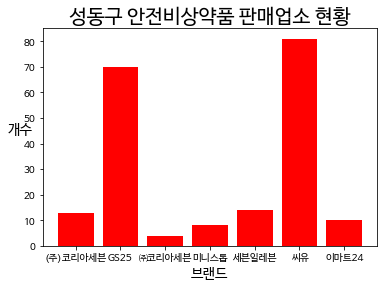

In [8]:
plt.rc('font', family='NanumBarunGothic') 

plt.bar(df1.index, df1['사업장명'], color='red')

plt.title('성동구 안전비상약품 판매업소 현황', fontsize=20)
plt.xlabel('브랜드', fontsize=14)
plt.ylabel('개수',rotation='horizontal',fontsize=14)

In [9]:
name=input('원하는 주소를 입력하세요 : ')

df2=df[(df['도로명주소'].str.contains(name))]
df2

원하는 주소를 입력하세요 : 마조로


,개방자치단체코드,관리번호,인허가일자,전화번호,도로명주소,도로명우편번호,사업장명,브랜드,위도,경도
10,3030000,PHMH320213030033087500025,20211210,NaN,서울특별시 성동구 마조로9길 11-1(행당동),4760,(주)코리아세븐 행당미르점,(주)코리아세븐,37.561146,127.040080
24,3030000,PHMH320173030033087500002,20170102,NaN,서울특별시 성동구 마조로 55 116호 (마장동 금호어울림아파트),4759,GS25 마장어울림점,GS25,37.562756,127.041520
26,3030000,PHMH320193030033087500008,20190225,NaN,서울특별시 성동구 마조로15길 5 1층 (마장동),4759,GS25 마장중앙,GS25,37.563591,127.040922
73,3030000,PHMH320193030033087500028,20190902,NaN,서울특별시 성동구 마조로 21 1층 (행당동),4760,GS25 한양제일점,GS25,37.559778,127.040820
74,3030000,PHMH320203030033087500017,20201117,02-2299-6658,서울특별시 성동구 마조로 37 (행당동),4760,GS25 한양중앙,GS25,37.561034,127.041234
88,3030000,PHMH320193030033087500011,20190315,NaN,서울특별시 성동구 마조로14길 2 1층 101호 (마장동),4758,미니스톱 한양대원룸,미니스톱,37.563101,127.042090
90,3030000,PHMH320173030033087500035,20170928,NaN,서울특별시 성동구 마조로11길 19 1층 101호 (행당동 행당동 근생주택),4760,미니스톱 한양대학사점,미니스톱,37.561660,127.039371
94,3030000,PHMH320123030033087500020,20121109,02-2295-8172,서울특별시 성동구 마조로15길 21 (마장동),4759,세븐일레븐 마장하영점,세븐일레븐,37.563559,127.039307
103,3030000,PHMH320123030033087500034,20121113,02-2281-0779,서울특별시 성동구 마조로5길 8 (행당동),4760,세븐일레븐 한양대역점,세븐일레븐,37.560087,127.040227
104,3030000,PHMH320193030033087500017,20190507,NaN,서울특별시 성동구 마조로 11 (행당동),4760,세븐일레븐 한양제일점,세븐일레븐,37.561937,127.040284


In [15]:
s_lat = df2.loc[df2.index[0], '위도']
s_lng = df2.loc[df2.index[0], '경도']

school_map = folium.Map(
    location=[s_lat,s_lng ], tiles ='OpenStreetMap' , zoom_start=20)

for idx in df2.index:
    lat = df2.loc[idx, '위도']
    lng = df2.loc[idx, '경도']
    
    folium.CircleMarker(
        location=[lat, lng], 
        color='#d0ff00',
        fill_color='#ff0000', 
        fill_opacity=0.9,
        weight=1,
        radius=5
    ).add_to(school_map)

school_map